# <font color='#0D45B3'>Import</font> Libraries

In [57]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from tweepy import API
from tweepy import Cursor
from tweepy import OAuthHandler
import json
import datetime
import re 
import string
import seaborn as sns
import nltk

# Store <font color='#DF482F'>API</font> Keys 

In [58]:
df = pd.read_csv('API_SET1.csv')

In [59]:
TwitterApiKey = df["Twitter_Api_Key"][0]
TwitterApiSecret = df["Twitter_Api_Secret_Key"][0]
TwitterApiAccessToken = df["Twitter_Api_access_token"][0]
TwitterApiSecretToken = df["Twitter_Api_secret_access_token"][0]

In [60]:
auth = tweepy.OAuthHandler(TwitterApiKey,TwitterApiSecret)
auth.set_access_token(TwitterApiAccessToken,TwitterApiSecretToken)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

# <font color='#0D45B3'>Selection</font> of Twitter Account

In [61]:
twitterAccount = "@WIONews"

In [62]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                      screen_name=twitterAccount,
                      count=None,
                      since_id=None,
                      max_id=None,trim_user=True,exclude_replies=True,contributor_details=False,
                      include_entities=False).items(50);

# Converted Tweets into <font color='#DF482F'>DataFrame</font>

In [63]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=["Tweets"])

Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities


In [64]:
df.head(10)

,Tweets
0,Several protests against a planned reform that...
1,#InPics | Did you know the #TajMahal is not th...
2,These satellites are owned by the London-based...
3,The bill is being promoted by President Gustav...
4,#InPics | Diwali is India’s biggest festival a...
5,"As per reports, former prime minister Johnson ..."
6,"Mateschitz, whose estimated net worth is $27 b..."
7,"#InPics | Every shape and size is beautiful, a..."
8,#InPics | The leg room has always been a major...
9,#InPics | From Hagrid to Severus Snape: 'Harry...


# <font color='#4FD231'>Text</font> Cleaning

In [65]:
def cleanupTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT :','',txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    return txt

In [66]:
df['Tweet'] = df['Tweets'].apply(cleanupTweet)

In [67]:
df.head()

,Tweets,Tweet
0,Several protests against a planned reform that...,Several protests against a planned reform that...
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...


# Text Subjectivity

In [68]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# Text Polarity

In [69]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [70]:
df['Subjectivity'] = df['Tweets'].apply(getTextSubjectivity)

In [71]:
df['Polarity'] = df['Tweets'].apply(getTextPolarity)

In [72]:
df.head()

,Tweets,Tweet,Subjectivity,Polarity
0,Several protests against a planned reform that...,Several protests against a planned reform that...,0.355556,0.177778
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...,0.500000,0.625000
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...,0.000000,0.000000
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...,0.166667,0.125000
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...,0.750000,0.575000


# Sentiment Intensity Analyzer

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [74]:
df['Polarity'] = df['Tweet'].apply(lambda Tweet: sid.polarity_scores(Tweet))
df.head()

,Tweets,Tweet,Subjectivity,Polarity
0,Several protests against a planned reform that...,Several protests against a planned reform that...,0.355556,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co..."
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...,0.166667,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp..."
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...,0.750000,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou..."


In [75]:
df['Compound'] = df['Polarity'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound
0,Several protests against a planned reform that...,Several protests against a planned reform that...,0.355556,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co...",0.4404
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...,0.166667,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4215
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...,0.750000,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.7876


In [76]:
df['comp_score'] = df['Compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score
0,Several protests against a planned reform that...,Several protests against a planned reform that...,0.355556,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co...",0.4404,pos
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...,0.166667,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4215,pos
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...,0.750000,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.7876,pos


In [77]:
df['neg_score'] = df['Polarity'].apply(lambda score_dict: score_dict['neg'])
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score,neg_score
0,Several protests against a planned reform that...,Several protests against a planned reform that...,0.355556,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co...",0.4404,pos,0.088
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...,0.166667,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4215,pos,0.000
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...,0.750000,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.7876,pos,0.000


In [78]:
df['pos_score'] = df['Polarity'].apply(lambda score_dict: score_dict['pos'])
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score,neg_score,pos_score
0,Several protests against a planned reform that...,Several protests against a planned reform that...,0.355556,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co...",0.4404,pos,0.088,0.221
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...,0.166667,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4215,pos,0.000,0.135
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...,0.750000,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.7876,pos,0.000,0.390


In [79]:
df['neu_score'] = df['Polarity'].apply(lambda score_dict: score_dict['neu'])
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score,neg_score,pos_score,neu_score
0,Several protests against a planned reform that...,Several protests against a planned reform that...,0.355556,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co...",0.4404,pos,0.088,0.221,0.691
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...,0.166667,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4215,pos,0.000,0.135,0.865
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...,0.750000,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.7876,pos,0.000,0.390,0.610


# Final Data

In [80]:
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Compound,comp_score,neg_score,pos_score,neu_score
0,Several protests against a planned reform that...,Several protests against a planned reform that...,0.355556,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co...",0.4404,pos,0.088,0.221,0.691
1,#InPics | Did you know the #TajMahal is not th...,InPics | Did you know the TajMahal is not the ...,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000
2,These satellites are owned by the London-based...,These satellites are owned by the London-based...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000
3,The bill is being promoted by President Gustav...,The bill is being promoted by President Gustav...,0.166667,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4215,pos,0.000,0.135,0.865
4,#InPics | Diwali is India’s biggest festival a...,InPics | Diwali is India’s biggest festival an...,0.750000,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.7876,pos,0.000,0.390,0.610


In [81]:
df.isnull().sum()

Tweets          0
Tweet           0
Subjectivity    0
Polarity        0
Compound        0
comp_score      0
neg_score       0
pos_score       0
neu_score       0
dtype: int64

# Correlation

<AxesSubplot:>

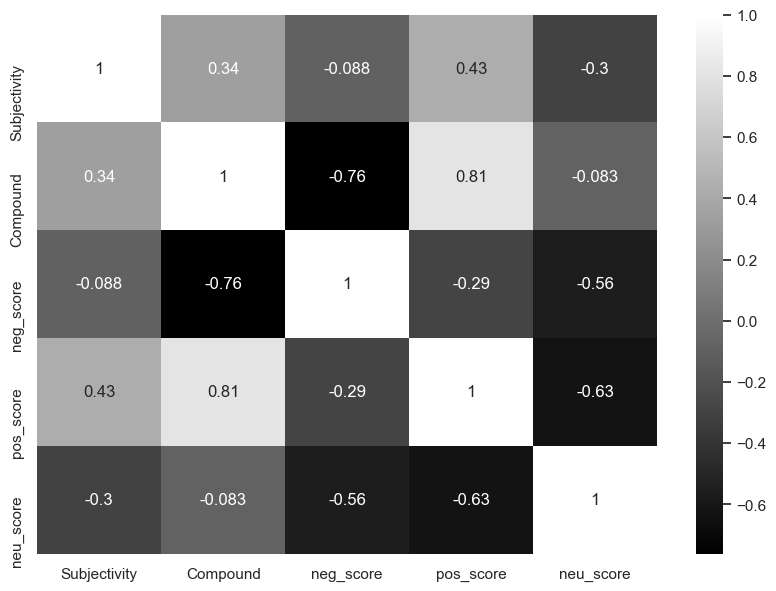

In [82]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(),annot = True,cmap = 'binary_r')

In [83]:
df.corr()

,Subjectivity,Compound,neg_score,pos_score,neu_score
Subjectivity,1.000000,0.335752,-0.087934,0.431684,-0.301995
Compound,0.335752,1.000000,-0.761780,0.812773,-0.082637
neg_score,-0.087934,-0.761780,1.000000,-0.292075,-0.561845
pos_score,0.431684,0.812773,-0.292075,1.000000,-0.627070
neu_score,-0.301995,-0.082637,-0.561845,-0.627070,1.000000


# Word <font color='#9132C8'>Cloud</font>

In [84]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

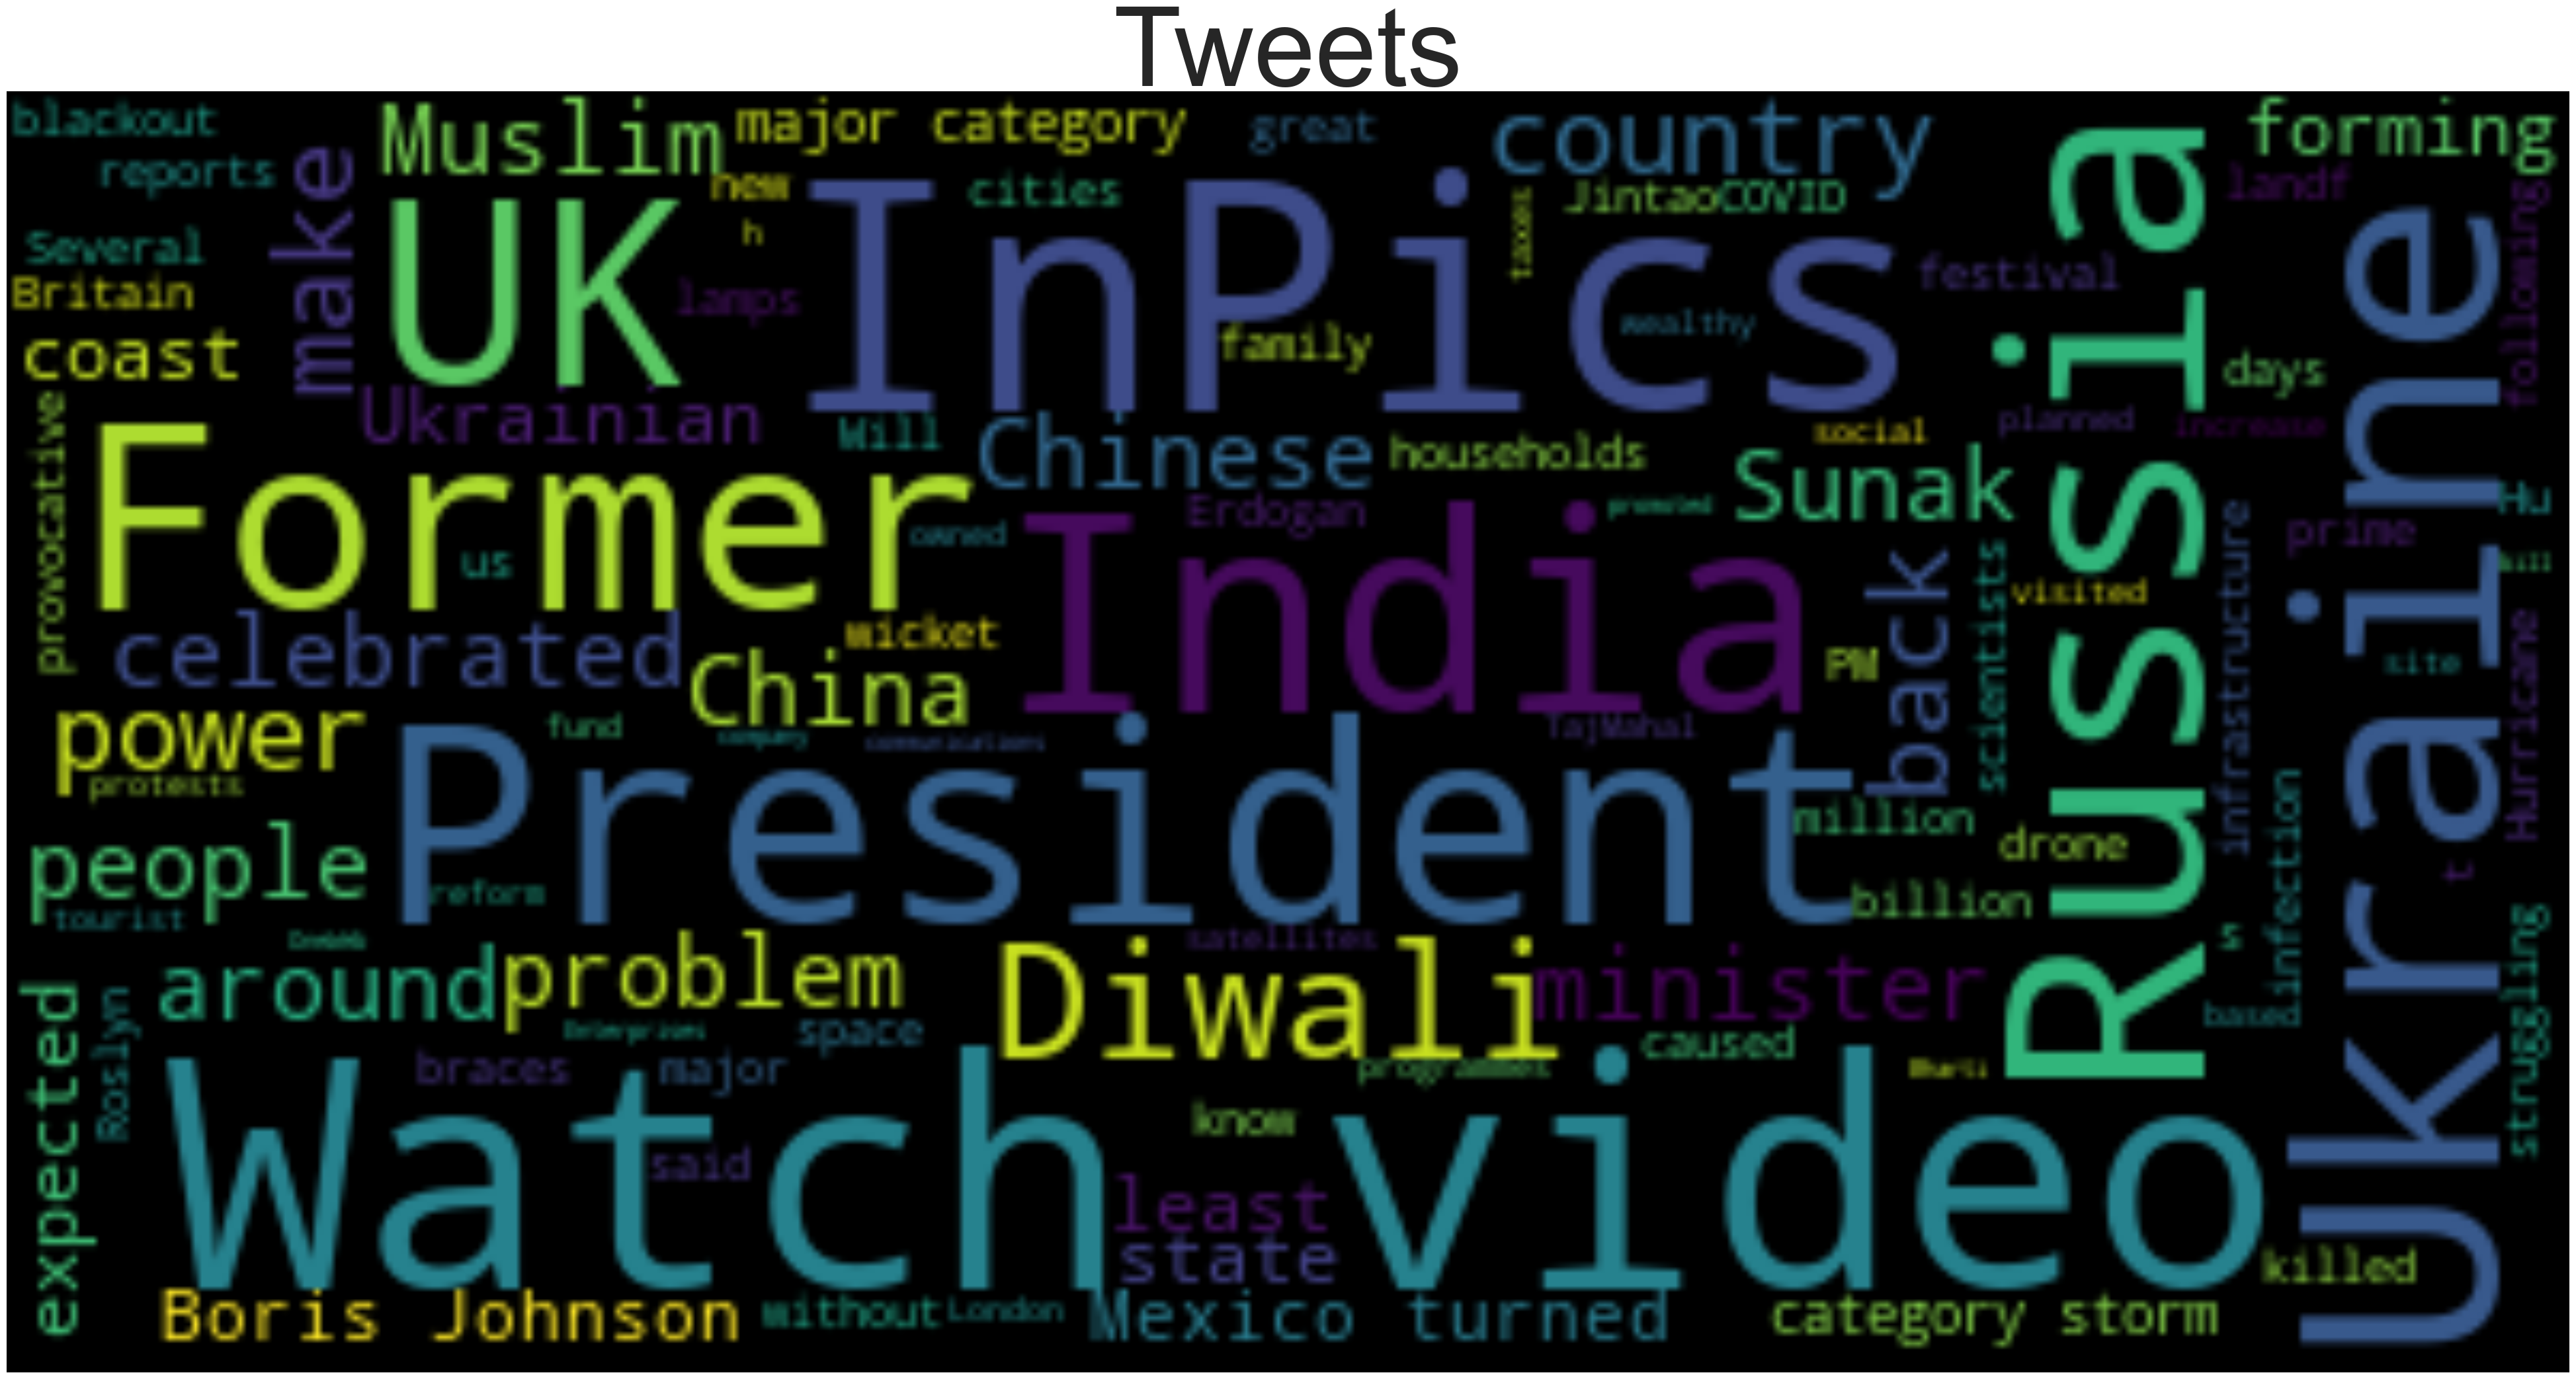

In [85]:
tweet_All = " ".join(review for review in df['Tweet'])
fig = plt.subplots(1, figsize=(50,50))
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title("Tweets",fontsize=120)
plt.axis('off')

# Visualization

## Compound score 

<AxesSubplot:xlabel='comp_score', ylabel='count'>

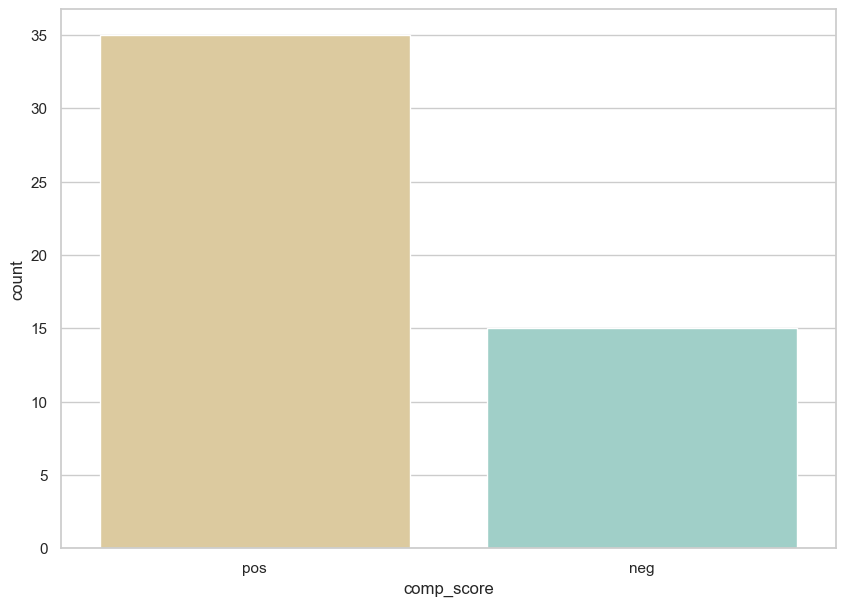

In [86]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
sns.countplot(x='comp_score',data=df,palette='BrBG')

## Compound value

<AxesSubplot:xlabel='Compound', ylabel='count'>

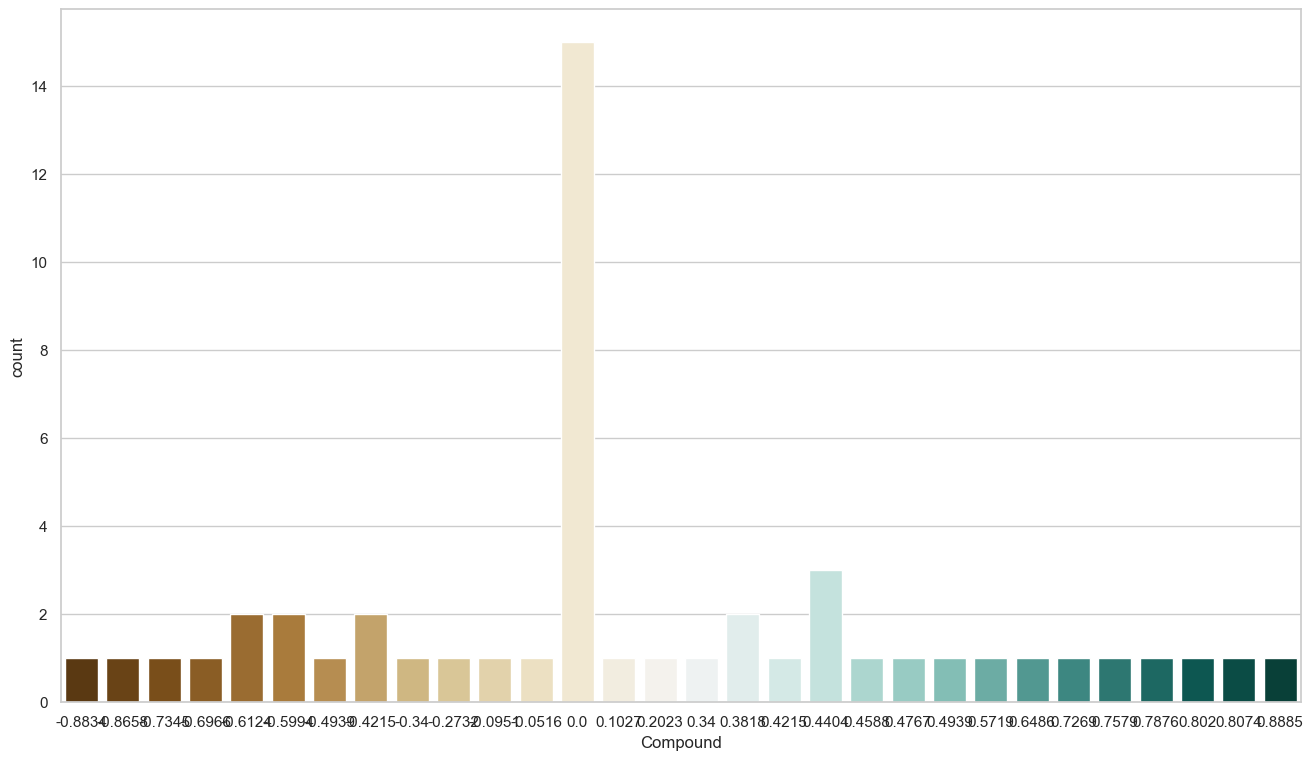

In [87]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set_style('whitegrid')
sns.countplot(x='Compound',data=df,palette='BrBG')

## Negative score

<AxesSubplot:xlabel='neg_score', ylabel='count'>

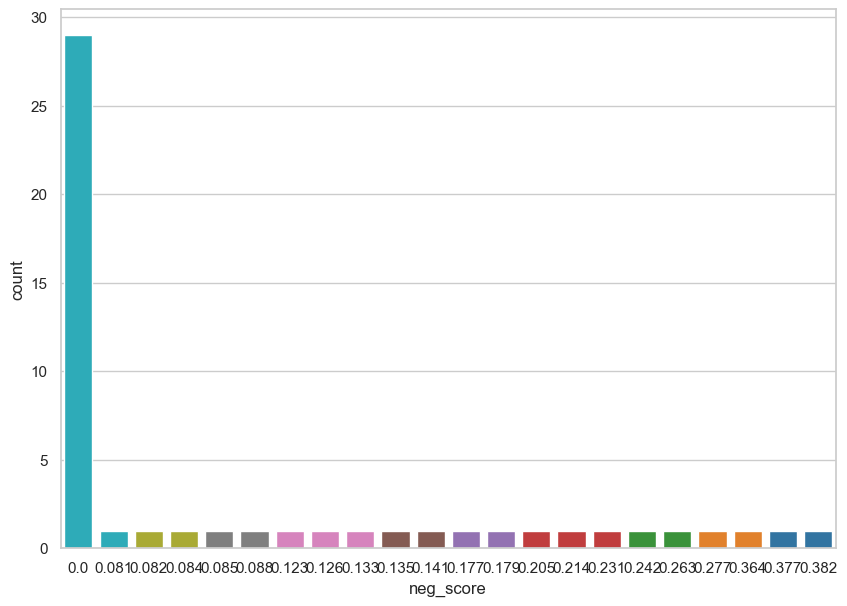

In [88]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
sns.countplot(x='neg_score',data=df,palette='tab10_r')

## Positive score

<AxesSubplot:xlabel='pos_score', ylabel='count'>

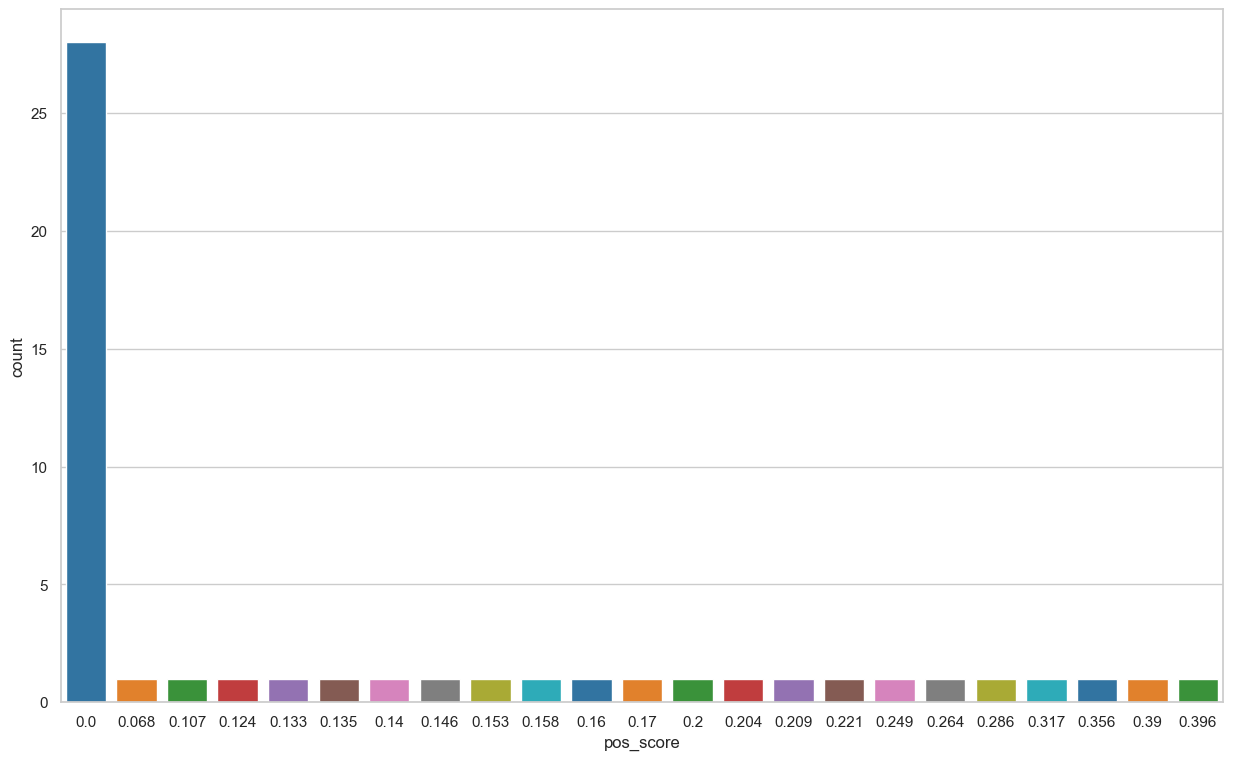

In [89]:
sns.set(rc={'figure.figsize':(15,9)})
sns.set_style('whitegrid')
sns.countplot(x='pos_score',data=df,palette='tab10')

## Neutral score

<AxesSubplot:xlabel='neu_score', ylabel='count'>

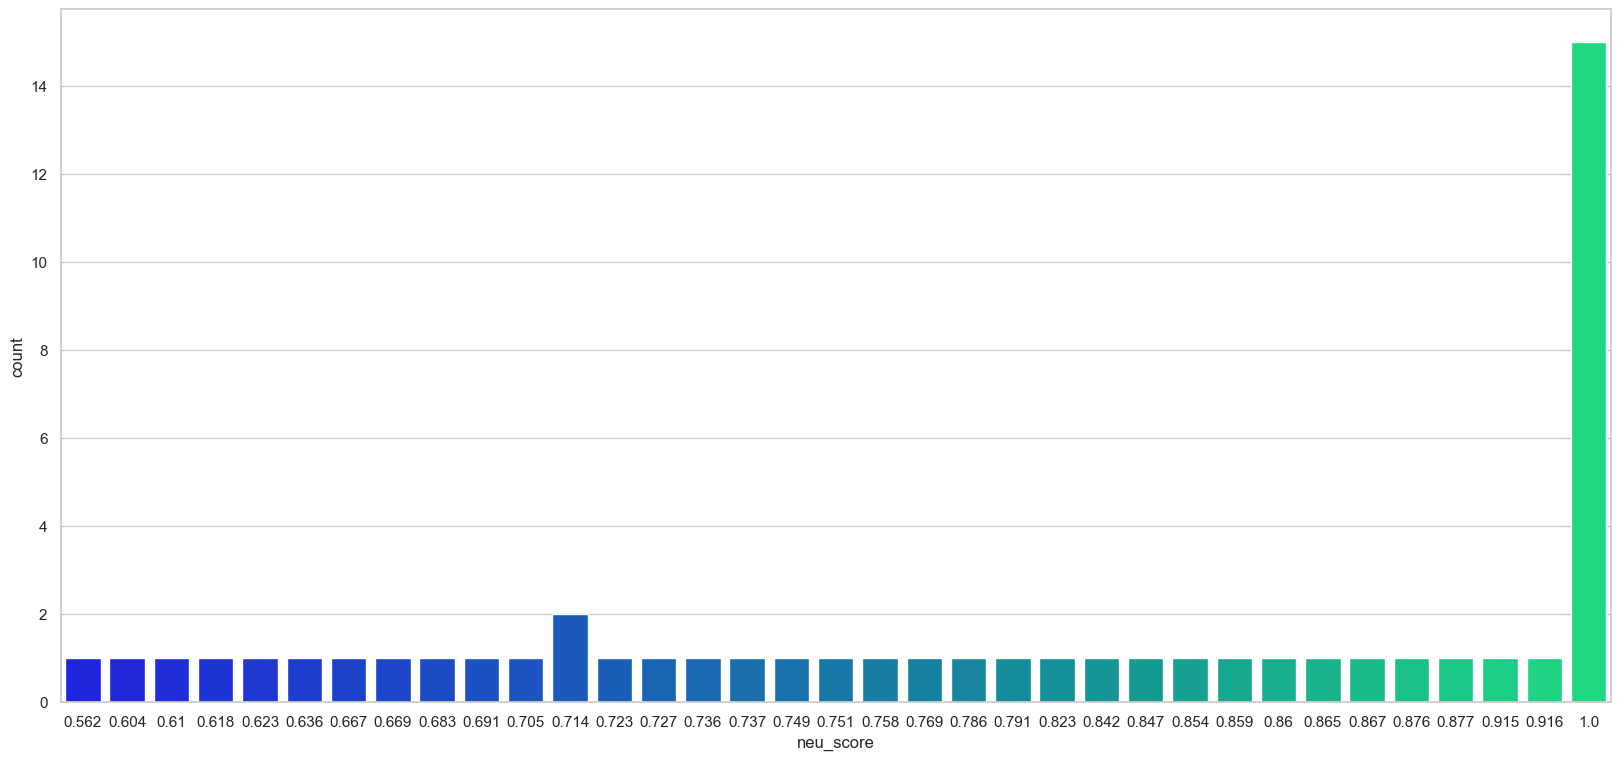

In [90]:
sns.set(rc={'figure.figsize':(20,9)})
sns.set_style('whitegrid')
sns.countplot(x='neu_score',data=df,palette='winter')

## Subjectivity score

<AxesSubplot:xlabel='Subjectivity', ylabel='count'>

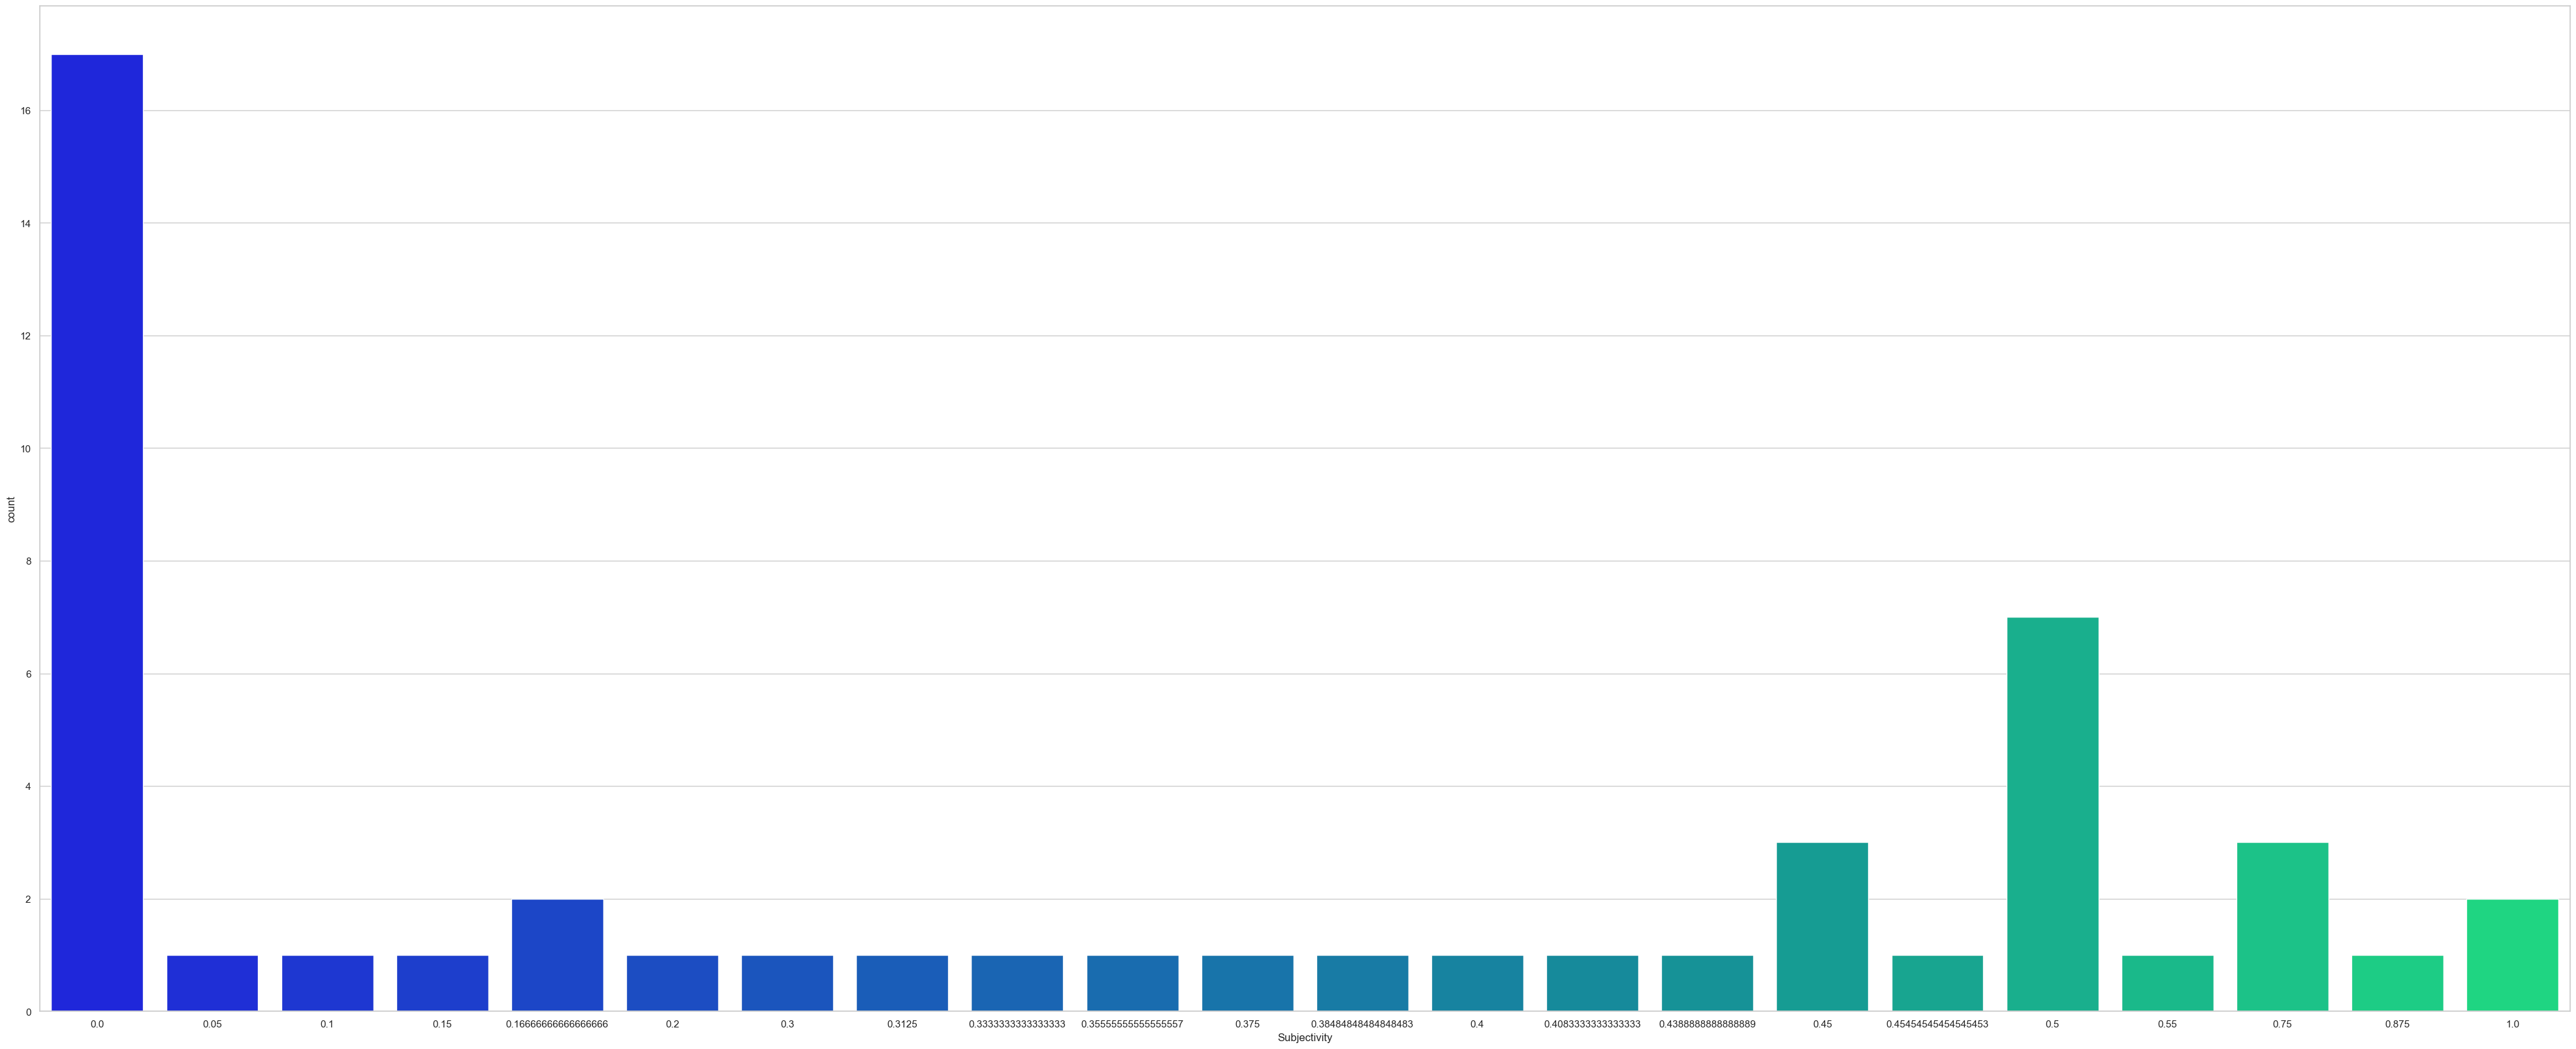

In [91]:
sns.set(rc={'figure.figsize':(50,20)})
sns.set_style('whitegrid')
sns.countplot(x='Subjectivity',data=df,palette='winter')

## Negative score and Compoud score

<AxesSubplot:xlabel='neg_score', ylabel='count'>

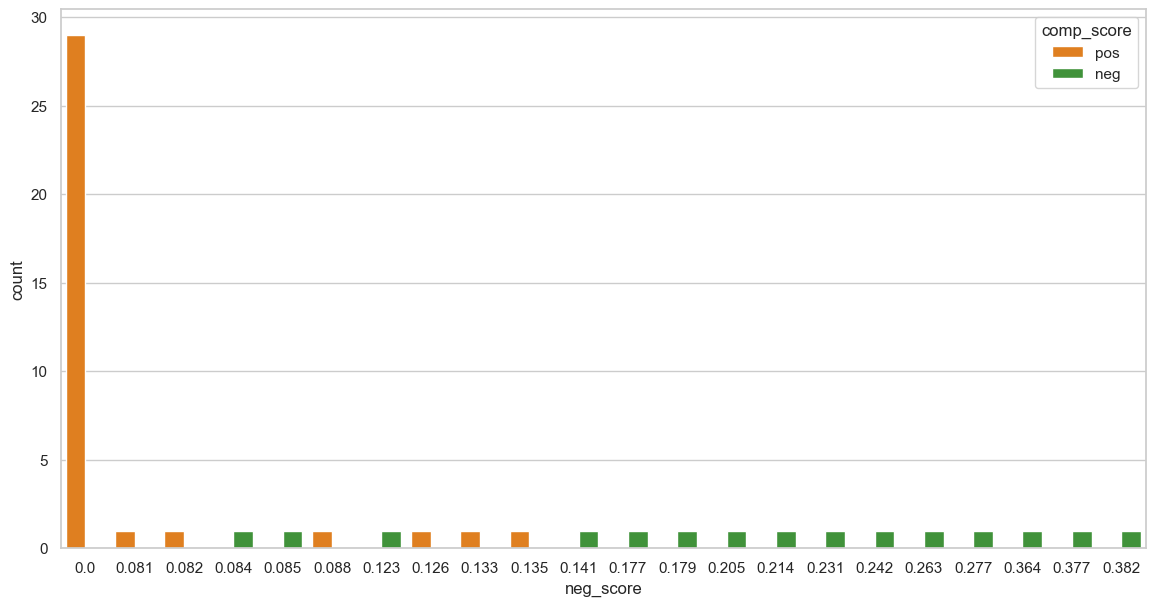

In [92]:
sns.set(rc={'figure.figsize':(14,7)})
sns.set_style('whitegrid')
sns.countplot(x='neg_score',hue='comp_score',data=df,palette='Paired_r')

## Positive score and Compound score

<AxesSubplot:xlabel='pos_score', ylabel='count'>

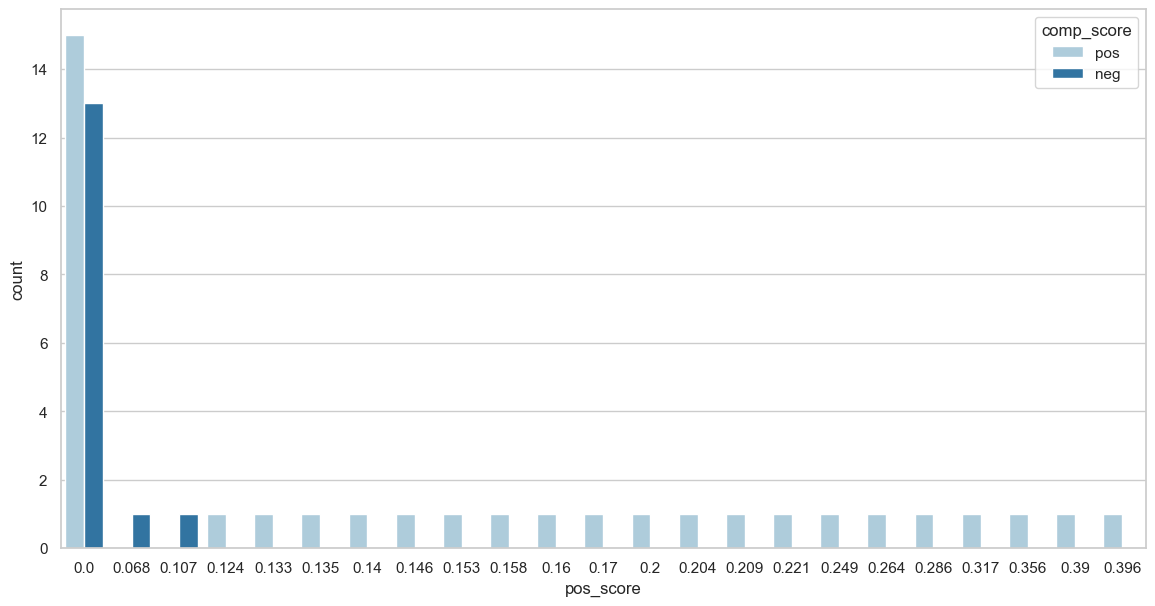

In [93]:
sns.set(rc={'figure.figsize':(14,7)})
sns.set_style('whitegrid')
sns.countplot(x='pos_score',hue='comp_score',data=df,palette='Paired')

## Neutral score and Compound score

<AxesSubplot:xlabel='neu_score', ylabel='count'>

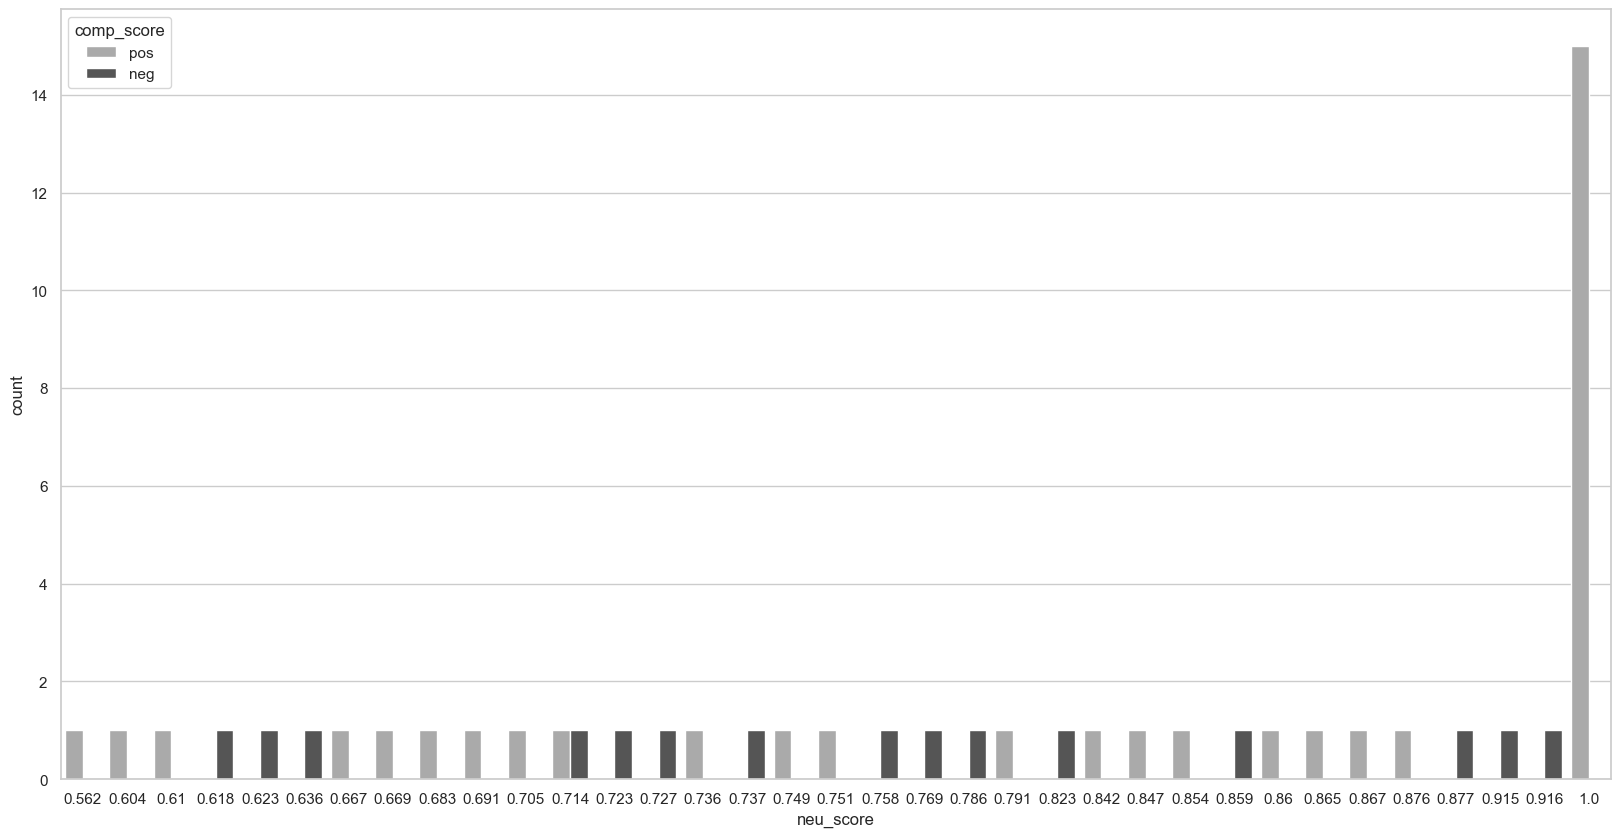

In [94]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('whitegrid')
sns.countplot(x='neu_score',hue='comp_score',data=df,palette='binary')

## Subjectivity score and Compound score

<AxesSubplot:xlabel='Subjectivity', ylabel='count'>

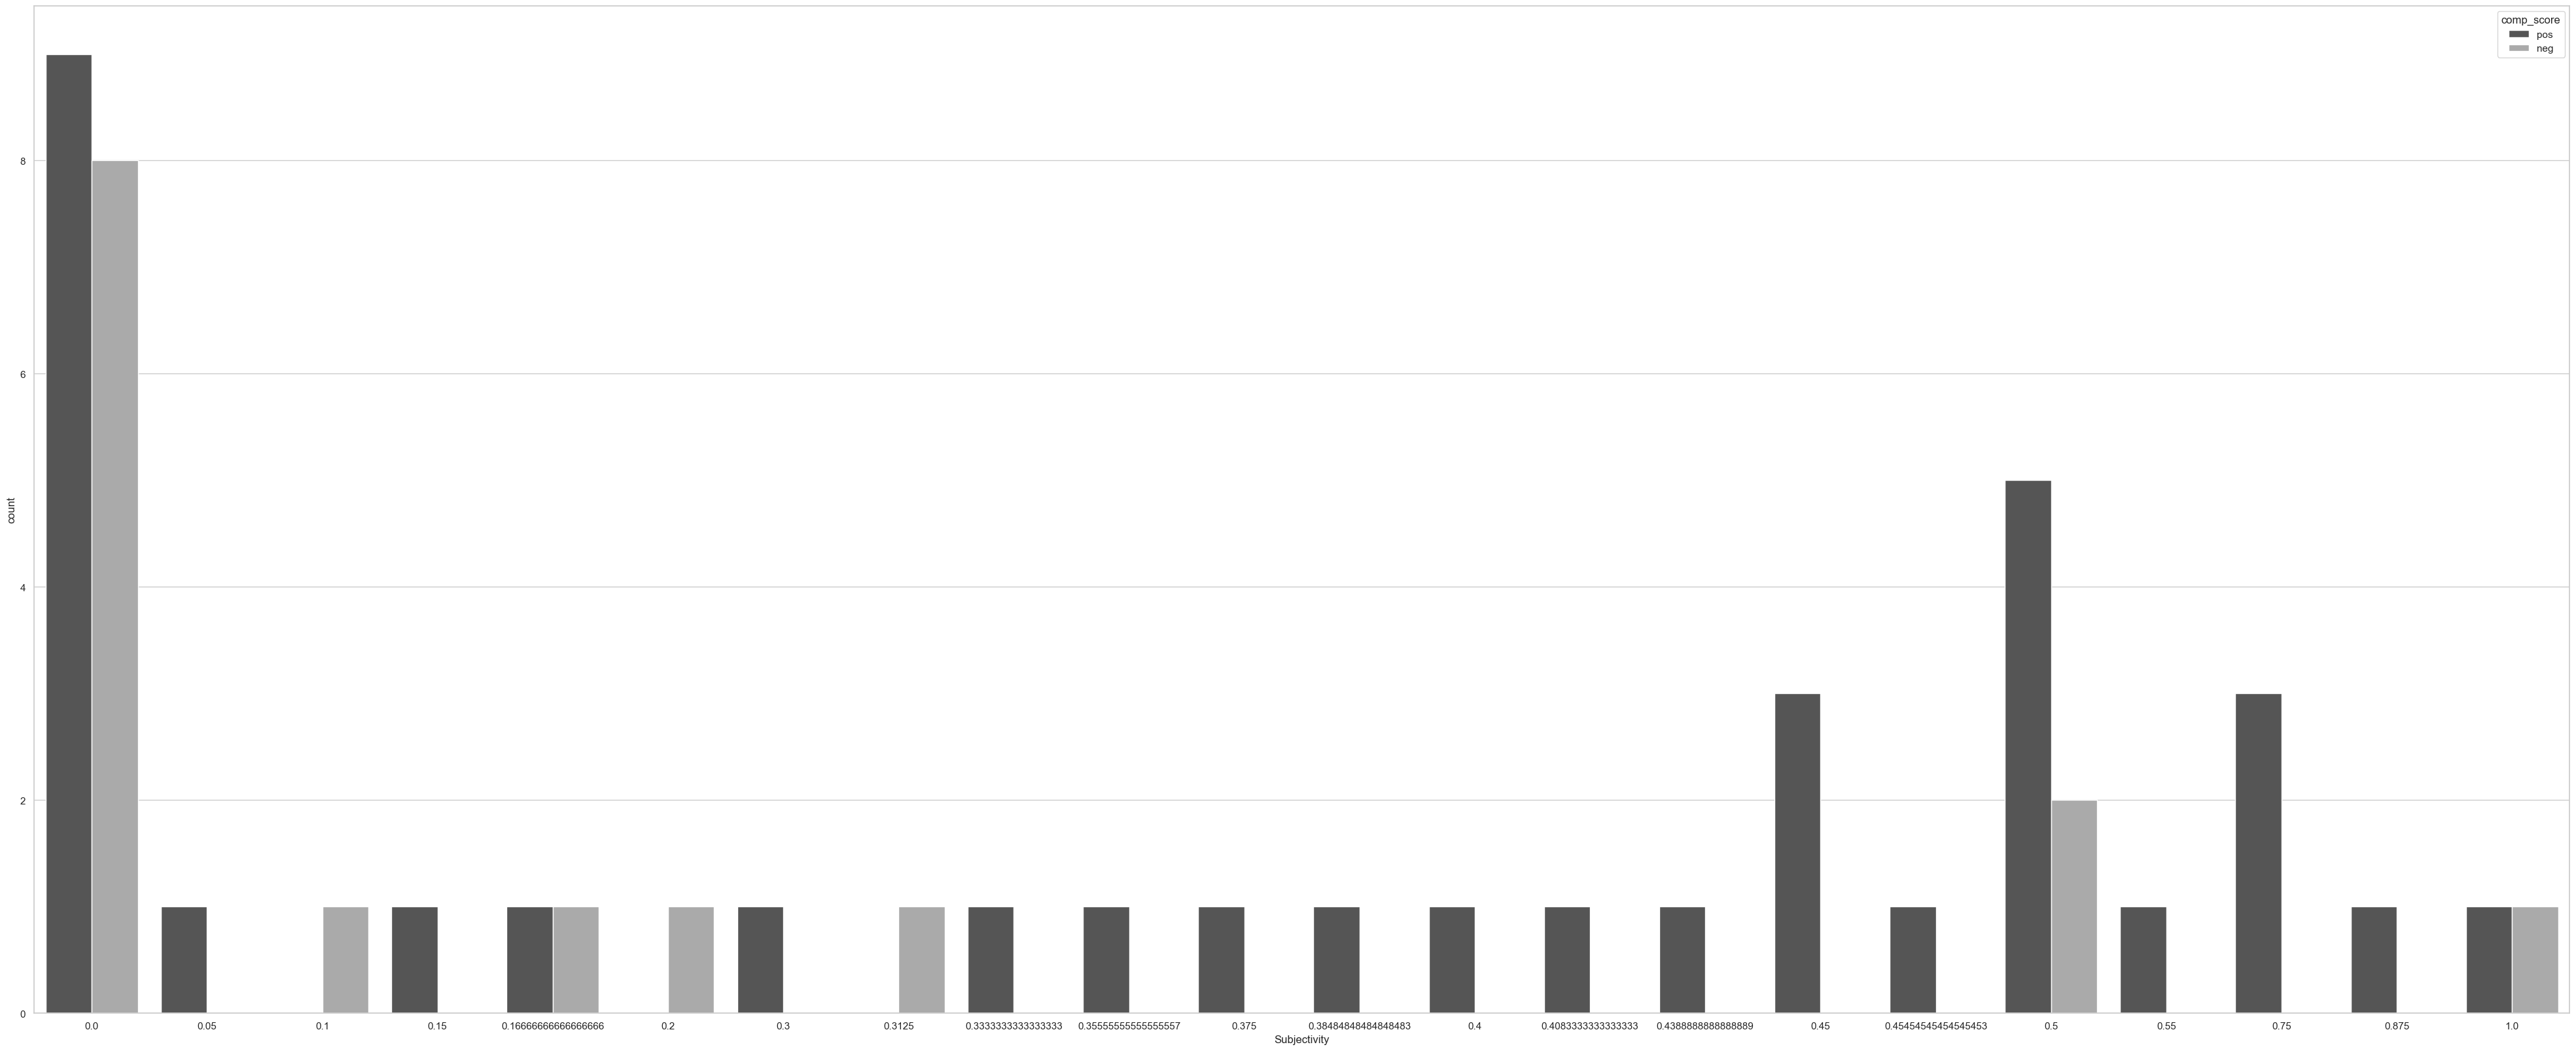

In [95]:
sns.set(rc={'figure.figsize':(50,20)})
sns.set_style('whitegrid')
sns.countplot(x='Subjectivity',hue='comp_score',data=df,palette='binary_r')

## Positive score and Negative score

<AxesSubplot:xlabel='pos_score', ylabel='neg_score'>

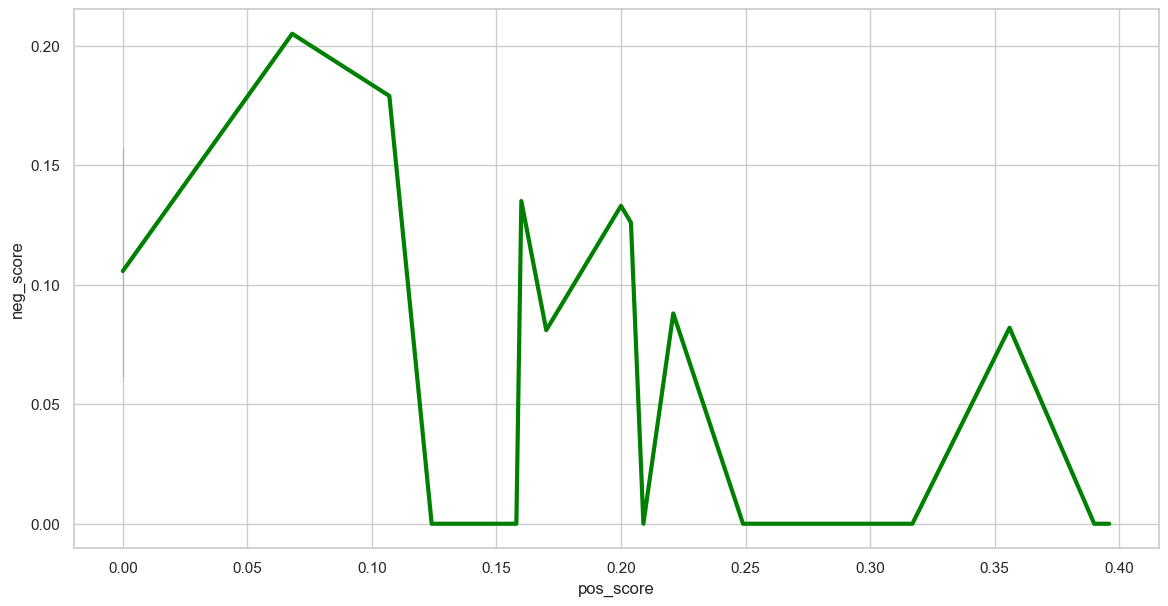

In [96]:
sns.set(rc={'figure.figsize':(14,7)})
sns.set_style('whitegrid')
sns.lineplot( x='pos_score',size=None,linewidth=3,
    y='neg_score',
    data=df,color='green')

# Machine Learning

In [147]:
X = df['Tweet']
y = df['comp_score']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)

# CountVectorizer

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts

<40x403 sparse matrix of type '<class 'numpy.int64'>'
	with 650 stored elements in Compressed Sparse Row format>

# (Documents,Features)

In [151]:
X_train_counts.shape

(40, 403)

In [152]:
count_vect.get_feature_names()

['15',
 '19',
 '2022',
 '24',
 '40',
 '90',
 'about',
 'accident',
 'after',
 'again',
 'against',
 'airplanes',
 'al',
 'all',
 'always',
 'american',
 'amidst',
 'an',
 'and',
 'approaches',
 'are',
 'argentina',
 'around',
 'as',
 'asked',
 'at',
 'attack',
 'august',
 'avoid',
 'back',
 'backs',
 'ball',
 'ballon',
 'ban',
 'bangladesh',
 'based',
 'bat',
 'be',
 'bears',
 'beautiful',
 'become',
 'been',
 'being',
 'bharti',
 'biggest',
 'bill',
 'black',
 'blackout',
 'blackouts',
 'body',
 'boris',
 'boy',
 'braces',
 'britain',
 'bus',
 'busy',
 'but',
 'by',
 'called',
 'capital',
 'caribbean',
 'category',
 'caused',
 'celebrated',
 'celebs',
 'ceremony',
 'china',
 'chinese',
 'cinematic',
 'cites',
 'cities',
 'claims',
 'clay',
 'coast',
 'commonly',
 'communications',
 'company',
 'considering',
 'contenders',
 'corner',
 'could',
 'countries',
 'country',
 'covid',
 'covid19',
 'cpc',
 'cristiano',
 'curbs',
 'darkness',
 'days',
 'de',
 'debris',
 'deploys',
 'desolate'

# Transform Counts to Frequencies with Tf-IDF

In [153]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(40, 403)

# Tf-IDF Vectorizer

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(40, 403)

# Training a Classifier

In [155]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

# Pipeline

In [156]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC()),])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

# Results

In [157]:
predictions = text_clf.predict(X_test)

In [158]:
from sklearn import metrics

In [159]:
print(metrics.confusion_matrix(y_test,predictions))

[[1 2]
 [0 7]]


In [160]:
metrics.f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions))

0.7625000000000001

# Accuracy <font color='red'>80%</font>

In [161]:
print(metrics.classification_report(y_test,predictions,zero_division=1))

              precision    recall  f1-score   support

         neg       1.00      0.33      0.50         3
         pos       0.78      1.00      0.88         7

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10

